In [2]:
rawData = open("/Users/mahmoudwatfa/Documents/Ryerson/Capstone820/Coding/tripadvisor_hotel_reviews.csv").read()

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahmoudwatfa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Print some parts of the data to understand a bit about its structure
rawData[0:2306]

'Review,Rating\n"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  ",4\n"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bat

In [17]:
# We want to form a list of review text followed by rating.
# We observe that the review text ends with a comma, few spaces and double quotation.
# This is then followed by the rating as a number, after which a new review text is available and so on
# We parse the data by replacing the comma, spaces and double quote with a new line and then we split on a new line
parsedData = rawData.replace(',  ",', '\n').split('\n')

In [18]:
# We print the result for the first 5 entries, noting that the first entry is a column title
# Now all the reviews and number ratings are in the form of a list
parsedData[0:5]

['Review,Rating',
 '"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night',
 '4',
 '"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting r

In [20]:
# We extract the review text starting at the second entry and then increments of 2
reviewList = parsedData[1::2]
# We extract the number rating starting at the third entry and then increments of 2
ratingList = parsedData[2::2]

In [21]:
# We print some of the entries to verify the result
print(reviewList[0:2])
print(ratingList[0:2])

['"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night', '"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unli

In [27]:
# We verify the length of the review list and the length of the number ratings
print('The number of review entries is:', len(reviewList))
print('The number of rating entries is:', len(ratingList))

The number of review entries is: 20492
The number of rating entries is: 20491


In [28]:
# Try to see what the last entry is
reviewList[-1]


''

In [29]:
# We remove the last entry as it is not associated with any review or rating
reviewList.pop()

''

In [31]:
# We verify again the length of the review list and the length of the number ratings
print('The number of review entries is:', len(reviewList))
print('The number of rating entries is:', len(ratingList))

The number of review entries is: 20491
The number of rating entries is: 20491


In [33]:
# Create a panda dataframe consisting of the rating and the review text
import pandas as pd
pd.set_option('display.max_colwidth', 100)
raw_rated_reviews = pd.DataFrame({
    'rating': ratingList,
    'review': reviewList
})

raw_rated_reviews.head()

,rating,review
0,4,"""nice hotel expensive parking got good deal st..."
1,2,"""ok nothing special charge diamond member hilt..."
2,3,"""nice rooms not 4* experience hotel monaco sea..."
3,5,"""unique, great stay, wonderful time hotel mona..."
4,5,"""great stay great stay, went seahawk game awes..."


In [34]:
raw_rated_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  20491 non-null  object
 1   review  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [96]:
raw_rated_reviews.isnull()

# Check if there is any missing review entry
count_1 = raw_rated_reviews["review"].isna().sum()
print('The number of missing review entries is:', count_1)

# Check if the number rating is different from the numbers 1, 2, 3, 4, 5
# temp = raw_rated_reviews['rating']
# temp = [int(i) for i in temp]
# count_2 = [0]*len(temp)
# for i in range(0,len(temp)):
#     if (temp[i] < 1 or temp[i]>5):
#         count_i = 1

# print('The number of invalid ratings is:', sum(count_2))

The number of missing review entries is: 0


In [99]:
import numpy as np

unique_ratings, count_ratings = np.unique(ratingList, return_counts=True)

for i in range(0,len(unique_ratings)):
    print('There are', count_ratings[i], 'reviews with a rating of: ', unique_ratings[i])


There are 1421 reviews with a rating of:  1
There are 1793 reviews with a rating of:  2
There are 2184 reviews with a rating of:  3
There are 6039 reviews with a rating of:  4
There are 9054 reviews with a rating of:  5


In [100]:
#pip install matplotlib

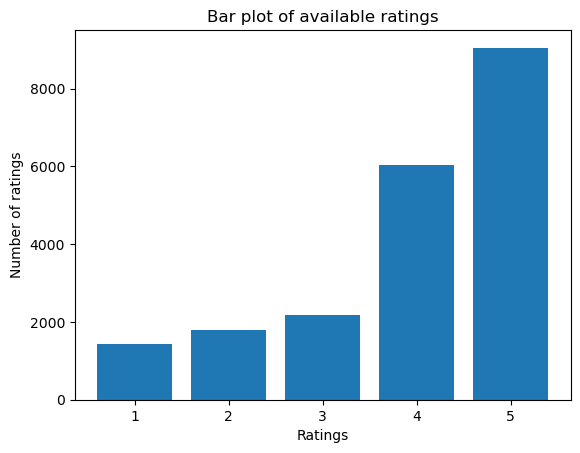

In [102]:
import matplotlib.pyplot as plt

plt.bar(unique_ratings, count_ratings)
plt.xlabel("Ratings")
plt.ylabel("Number of ratings")
plt.title("Bar plot of available ratings")
plt.show()

In [107]:
raw_rated_reviews.loc[0:20,:]

,rating,review
0,4,"""nice hotel expensive parking got good deal st..."
1,2,"""ok nothing special charge diamond member hilt..."
2,3,"""nice rooms not 4* experience hotel monaco sea..."
3,5,"""unique, great stay, wonderful time hotel mona..."
4,5,"""great stay great stay, went seahawk game awes..."
5,5,"""love monaco staff husband stayed hotel crazy ..."
6,5,"""cozy stay rainy city, husband spent 7 nights ..."
7,4,"""excellent staff, housekeeping quality hotel c..."
8,5,"""hotel stayed hotel monaco cruise, rooms gener..."
9,5,"""excellent stayed hotel monaco past w/e deligh..."


In [108]:
# Save the data into another dataframe
processed_data = raw_rated_reviews
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  20491 non-null  object
 1   review  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [112]:
import string
def remove_punctuation(text):
    text_no_punct = "".join([char for char in text if char not in string.punctuation])
    return text_no_punct

processed_data['review_no_punct'] = processed_data['review'].apply(lambda x: remove_punctuation(x))
processed_data.head()

,rating,review,review_no_punct
0,4,"""nice hotel expensive parking got good deal st...",nice hotel expensive parking got good deal sta...
1,2,"""ok nothing special charge diamond member hilt...",ok nothing special charge diamond member hilto...
2,3,"""nice rooms not 4* experience hotel monaco sea...",nice rooms not 4 experience hotel monaco seatt...
3,5,"""unique, great stay, wonderful time hotel mona...",unique great stay wonderful time hotel monaco ...
4,5,"""great stay great stay, went seahawk game awes...",great stay great stay went seahawk game awesom...


In [124]:
pd.set_option('display.max_colwidth', 150)
processed_data.iloc[20]

rating                                                                                                                                                                 5
review             "service service service spent week g-friend labor day bumbershoot, gray line airporter drops corner hotel 10 person cab 28 total make sure flat r...
review_no_punct    service service service spent week gfriend labor day bumbershoot gray line airporter drops corner hotel 10 person cab 28 total make sure flat rate...
Name: 20, dtype: object

In [125]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

processed_data['review_text_tokenized'] = processed_data['review_no_punct'].apply(lambda x: tokenize(x.lower()))

processed_data.head()

,rating,review,review_no_punct,review_text_tokenized
0,4,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check qui...",nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick ...,"[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary, arrived, late, evening, took, advice, previous, reviews, did, valet, ..."
1,2,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description no...",ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not ...,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, 20th, anniversary, seattle, start, booked, suite, paid, extra, websi..."
2,3,"""nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatt...",nice rooms not 4 experience hotel monaco seattle good hotel nt 4 levelpositives large bathroom mediterranean suite comfortable bed pillowsattentiv...,"[nice, rooms, not, 4, experience, hotel, monaco, seattle, good, hotel, nt, 4, levelpositives, large, bathroom, mediterranean, suite, comfortable, ..."
3,5,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs a...",unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal...,"[unique, great, stay, wonderful, time, hotel, monaco, location, excellent, short, stroll, main, downtown, shopping, area, pet, friendly, room, sho..."
4,5,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk...",great stay great stay went seahawk game awesome downfall view building did nt complain room huge staff helpful booked hotels website seahawk packa...,"[great, stay, great, stay, went, seahawk, game, awesome, downfall, view, building, did, nt, complain, room, huge, staff, helpful, booked, hotels, ..."


In [191]:
def digit_remove(text):
    parts = re.split(r'\d+', text)
    return ' '.join(parts)

processed_data['review_no_digits'] = processed_data['review'].apply(digit_remove)
processed_data.head()

,rating,review,review_no_punct,review_text_tokenized,review_no_digits
0,4,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check qui...",nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick ...,"[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary, arrived, late, evening, took, advice, previous, reviews, did, valet, ...","""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check qui..."
1,2,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description no...",ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not ...,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, 20th, anniversary, seattle, start, booked, suite, paid, extra, websi...","""ok nothing special charge diamond member hilton decided chain shot th anniversary seattle, start booked suite paid extra website description not..."
2,3,"""nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatt...",nice rooms not 4 experience hotel monaco seattle good hotel nt 4 levelpositives large bathroom mediterranean suite comfortable bed pillowsattentiv...,"[nice, rooms, not, 4, experience, hotel, monaco, seattle, good, hotel, nt, 4, levelpositives, large, bathroom, mediterranean, suite, comfortable, ...","""nice rooms not * experience hotel monaco seattle good hotel n't * level.positives large bathroom mediterranean suite comfortable bed pillowsatt..."
3,5,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs a...",unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal...,"[unique, great, stay, wonderful, time, hotel, monaco, location, excellent, short, stroll, main, downtown, shopping, area, pet, friendly, room, sho...","""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs a..."
4,5,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk...",great stay great stay went seahawk game awesome downfall view building did nt complain room huge staff helpful booked hotels website seahawk packa...,"[great, stay, great, stay, went, seahawk, game, awesome, downfall, view, building, did, nt, complain, room, huge, staff, helpful, booked, hotels, ...","""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk..."


In [195]:
#from textblob import TextBlob

In [197]:
# def spelling_correction(text):
#     text_blob = TextBlob(text)
#     final_text = text_blob.correct()
#     return str(final_text)

# processed_data['review_crct_spell'] = processed_data['review_no_digits'].apply(spelling_correction)

In [208]:
pip install pyspellchecker


Note: you may need to restart the kernel to use updated packages.


In [209]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 6.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=8e707f4e3d1ae2534fd0cb001ff4242adb3eb2814e8682e6f83b8add8141508e
  Stored in directory: /Users/mahmoudwatfa/Library/Caches/pip/wheels/5e/90/99/807a5ad861ce5d22c3c299a11df8cba9f31524f23ae6e645cb
Successfully built autocorrect
Note: you may need to restart the kernel to use updated packages.


In [210]:
# # Import the necessary libraries
# import pandas as pd
# from spellchecker import SpellChecker

# # Create a function for spelling correction
# def spelling_correction(text):
#     if text is None or not isinstance(text, str):
#         return text 
    
#     spell = SpellChecker()
#     these_words = text.split()  # Split the text into words
#     corrected_words = [spell.correction(word) for word in these_words]  # Correct each word
#     corrected_text = ' '.join(corrected_words)  # Rejoin the corrected words
#     return corrected_text

import pandas as pd
from autocorrect import Speller

# Create a function for spelling correction
def spelling_correction(text):
    spell = Speller()
    corrected_text = spell(text)
    return corrected_text

processed_data['review_crct_spell'] = processed_data['review_no_digits'].apply(spelling_correction)

In [211]:
processed_data.head()

,rating,review,review_no_punct,review_text_tokenized,review_no_digits,review_crct_spell
0,4,"""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check qui...",nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick ...,"[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary, arrived, late, evening, took, advice, previous, reviews, did, valet, ...","""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check qui...","""nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check qui..."
1,2,"""ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description no...",ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not ...,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, 20th, anniversary, seattle, start, booked, suite, paid, extra, websi...","""ok nothing special charge diamond member hilton decided chain shot th anniversary seattle, start booked suite paid extra website description not...","""ok nothing special charge diamond member hilton decided chain shot th anniversary seattle, start booked suite paid extra website description not..."
2,3,"""nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatt...",nice rooms not 4 experience hotel monaco seattle good hotel nt 4 levelpositives large bathroom mediterranean suite comfortable bed pillowsattentiv...,"[nice, rooms, not, 4, experience, hotel, monaco, seattle, good, hotel, nt, 4, levelpositives, large, bathroom, mediterranean, suite, comfortable, ...","""nice rooms not * experience hotel monaco seattle good hotel n't * level.positives large bathroom mediterranean suite comfortable bed pillowsatt...","""nice rooms not * experience hotel monaco seattle good hotel n't * level.positives large bathroom mediterranean suite comfortable bed pillowsatt..."
3,5,"""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs a...",unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal...,"[unique, great, stay, wonderful, time, hotel, monaco, location, excellent, short, stroll, main, downtown, shopping, area, pet, friendly, room, sho...","""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs a...","""unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs a..."
4,5,"""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk...",great stay great stay went seahawk game awesome downfall view building did nt complain room huge staff helpful booked hotels website seahawk packa...,"[great, stay, great, stay, went, seahawk, game, awesome, downfall, view, building, did, nt, complain, room, huge, staff, helpful, booked, hotels, ...","""great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk...","""great stay great stay, went seahawks game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahaw..."


In [201]:
# import hunspell

# def spelling_correction(text):
#     input_words = text.split()
#     corrected_words = [spellchecker.suggest(word)[0] if not spellchecker.spell(word) else word for word in input_words]
#     corrected_text = ' '.join(corrected_words)
#     return corrected_text

In [ ]:
processed_data.head()

In [212]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
ps = nltk.PorterStemmer()

In [213]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    #text = [word for word in tokens if word not in stop_words]
    text = [ps.stem(word) for word in tokens if word not in stop_words]
    return text

In [137]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer(analyzer=clean_text)
# x_counts = count_vect.fit_transform(processed_data['review'])

In [215]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
x_counts = count_vect.fit_transform(processed_data['review_crct_spell'])
print(x_counts.shape)
#print(count_vect.get_feature_names_out())

(20491, 47540)


In [216]:
x_counts_df = pd.DataFrame(x_counts.toarray())
x_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,47530,47531,47532,47533,47534,47535,47536,47537,47538,47539
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
word_freq = x_counts.sum(axis=0)
type(word_freq)

numpy.matrix

In [221]:
wf = pd.DataFrame(word_freq)
wf = wf.values.tolist()
wf=wf[0]

In [224]:
# Gets the indices and largest N numbers from a list
def get_N_largest(data, N):
    count = 0
    indices = [0]*N
    largest_numbers = [0]*N
    temp_data = data
    for i in range(N):
        current_max = max(temp_data)
        largest_numbers[i] = current_max
        current_index = temp_data.index(current_max)
        indices[i] = current_index
        temp_data[current_index] = -99
        
    return [indices, largest_numbers]

In [226]:
wf = pd.DataFrame(word_freq)
wf = wf.values.tolist()
wf=wf[0]
temp_wf = wf
N = 15 # get most used N words
[indices, numbers] = get_N_largest(temp_wf, N)

In [227]:
col_names_wf = count_vect.get_feature_names_out()[indices]

print(col_names_wf)

['hotel' 'room' 'stay' 'great' 'nt' 'good' 'staff' 'night' 'locat' 'nice'
 'day' 'time' 'restaur' 'clean' 'servic']


In [228]:
temp_x_counts_df = x_counts_df
temp_x_counts_df.columns = count_vect.get_feature_names_out()
temp_x_counts_df

,,aa,aaa,aaaa,aaaaaa,aaaaaaaaa,aaaaaaaaaaaaaaa,aaahhh,aab,aaffaa,...,ü,üdefinit,üdescrib,üdifficult,üe,üust,üâili,üã,üè,üècia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
wf_data_set = x_counts_df[col_names_wf]
wf_data_set

,hotel,room,stay,great,nt,good,staff,night,locat,nice,day,time,restaur,clean,servic
0,2,3,3,1,0,1,0,2,1,5,0,0,0,1,0
1,7,6,1,1,0,4,2,2,0,1,1,0,0,1,0
2,3,9,4,3,6,1,0,5,0,3,0,0,0,0,1
3,4,1,2,3,2,0,1,0,1,2,0,1,0,0,1
4,3,2,2,4,6,1,1,0,1,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0,1,3,1,2,0,1,0,0,1,0,2,1,1,1
20487,2,0,0,4,0,0,0,0,1,1,0,0,0,0,0
20488,2,3,0,0,1,1,1,0,0,1,0,0,1,1,1
20489,36,18,6,1,13,1,3,5,3,0,7,4,1,2,0


In [234]:
random_data_corr = wf_data_set.sample(15)
random_data_corr

,hotel,room,stay,great,nt,good,staff,night,locat,nice,day,time,restaur,clean,servic
12970,2,4,2,0,1,1,0,0,0,2,0,0,1,1,2
10894,0,1,0,0,0,4,0,0,1,1,2,0,0,1,0
6607,1,1,1,0,0,2,2,0,0,2,0,0,1,1,1
7560,1,4,1,0,2,3,0,5,1,1,0,0,2,0,0
14348,1,0,0,0,1,2,0,0,0,0,0,1,2,0,0
16191,6,2,4,1,5,2,3,1,3,1,3,1,1,1,2
19418,1,1,0,0,0,1,2,1,3,0,1,1,0,2,0
11423,2,0,0,2,1,0,0,1,0,0,1,1,0,1,0
2990,4,0,1,2,1,2,2,0,0,1,0,0,0,1,0
16248,2,2,0,0,1,0,0,0,0,1,0,0,0,0,1


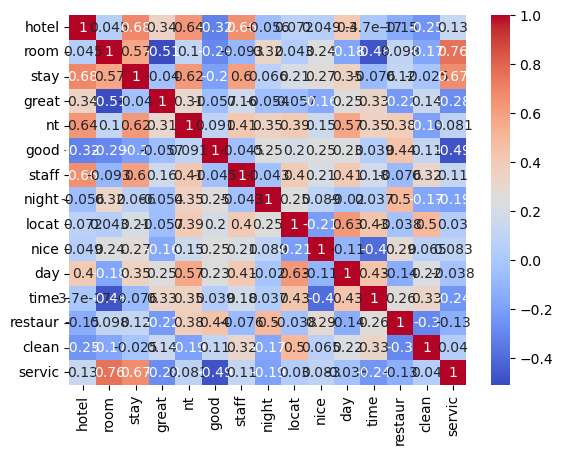

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = random_data_corr.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [236]:
%store processed_data
%store raw_rated_reviews

Stored 'processed_data' (DataFrame)
Stored 'raw_rated_reviews' (DataFrame)


In [237]:
with open('myParameters.py', 'w') as script:
    script.write("processed_data = {}\n".format(processed_data))
    script.write("raw_rated_reviews = {}\n".format(raw_rated_reviews))